# Ultimate Technologies Inc. Take-Home Challenge

created on Google Colab.

### Importing Libraries & Load Data

In [1]:
# Import Standard Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Import Modeling Libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from scipy.stats import ttest_ind

In [20]:
# Import Additional Libraries
from copy import deepcopy
from matplotlib.dates import HourLocator

In [61]:
# Changing default plot sizes 
plt.rcParams['figure.figsize'] = [10, 7.5]

### Loading Dataset

In [3]:
# Accessing Google Drive by mounting it locally
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Location on Google Drive
repo = 'challenge_ultimate'
%cd /content/drive/MyDrive/colab_notebooks/GitHub/{repo}/

# Load data files into pandas
logins = pd.read_json('logins.json',convert_dates=True)
ultimate = pd.read_json('ultimate_data_challenge.json')

/content/drive/MyDrive/colab_notebooks/GitHub/challenge_ultimate


In [5]:
# Unmount Google Drive.
drive.flush_and_unmount()

## Data Wrangling

### Logins Dataset

In [39]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [40]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [49]:
logins.describe(datetime_is_numeric=True)

,login_time
count,93142
mean,1970-02-26 19:09:39.779648278
min,1970-01-01 20:12:16
25%,1970-02-04 10:37:19.750000
50%,1970-03-01 06:33:05.500000
75%,1970-03-22 04:01:10.750000
max,1970-04-13 18:57:38


In [47]:
# Characterizing the NaN within the data.
logins.isna().sum()

login_time    0
dtype: int64

### Ulitamate Dataset

In [41]:
ultimate.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [43]:
ultimate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [44]:
ultimate.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [46]:
# Characterizing the NaN within the data.
ultimate.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

There are NaN values within the dataset.  After EDA, will probably use median to fill in the values for the avg_rating(s) variables and ignore the phone NaNs or replace with zero.

## Exploratory Data Analysis

In [10]:
# Creating a Counter for logins by 15-minute intervals.
logins_count = deepcopy(logins)
logins_count["count"] = 1
logins_count = logins_count.set_index("login_time")
logins_count_15min = logins_count.groupby(pd.Grouper(freq="15Min")).sum()
logins_count_15min.index.name = "DateTime"

In [50]:
logins_count.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [51]:
logins_count_15min.head()

,count
DateTime,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [53]:
logins_count_15min.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


In [13]:
# Creating a Counter for logins by day intervals.
logins_count_day = logins_count_15min.groupby(logins_count_15min.index.date).mean()
logins_count_day = logins_count_day[1 : -1]
logins_count_day.index.name = "Date"

In [52]:
logins_count_day.head()

,count
Date,
1970-01-02,7.093750
1970-01-03,8.260417
1970-01-04,8.208333
1970-01-05,4.781250
1970-01-06,5.583333


In [54]:
logins_count_day.describe()

,count
count,101.000000
mean,9.553940
std,3.515482
min,4.781250
25%,6.750000
50%,8.718750
75%,11.895833
max,19.677083


Text(0.5, 1.0, 'Login Count by day')

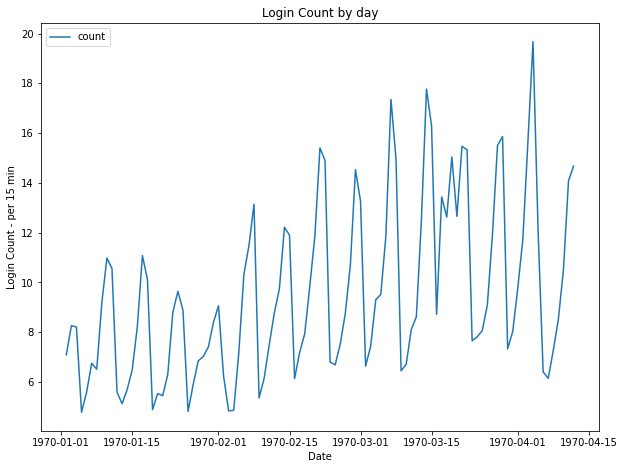

In [62]:
# Creating plot of login count by day.
logins_count_day.plot(y="count")
plt.ylabel("Login Count - per 15 min")
plt.title("Login Count by day")

Text(0.5, 1.0, 'Login Count - Day of Week')

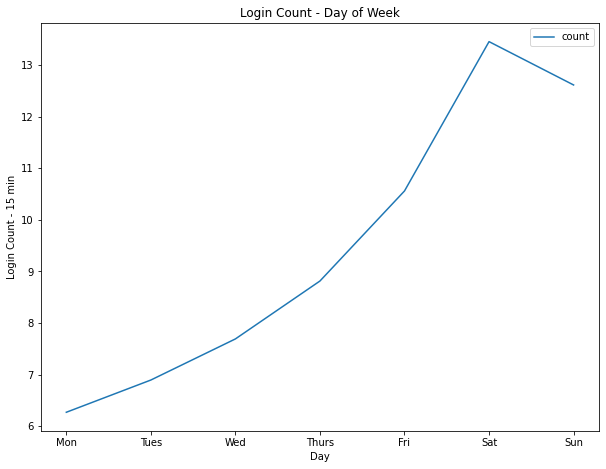

In [63]:
# Plot Mean Count by Day of the Week
logins_count_week = logins_count_15min["1970-01-02" : "1970-04-12"].groupby(logins_count_15min["1970-01-02" : "1970-04-12"].index.weekday).mean()
logins_count_week.index.name = "Day"

logins_count_week.plot(y="count")
plt.xticks(ticks=range(7), labels=["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"])
plt.ylabel("Login Count - 15 min")
plt.title("Login Count - Day of Week")

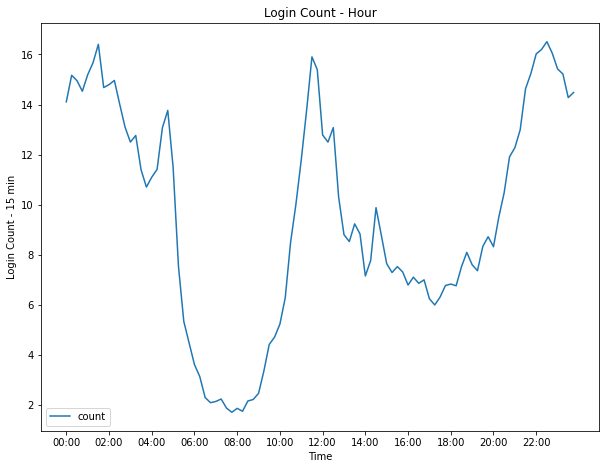

In [64]:
# Plot Mean Login Count by Hour
logins_count_ave_day = logins_count_15min.groupby(logins_count_15min.index.time).mean()
logins_count_ave_day.index.name = "Time"

logins_count_ave_day.plot(y="count")
plt.xticks([7200 * h for h in range(12)])
plt.ylabel("Login Count - 15 min")
plt.title("Login Count - Hour")
plt.show()

Text(0.5, 1.0, 'Login Rate by Time with Days of the Week')

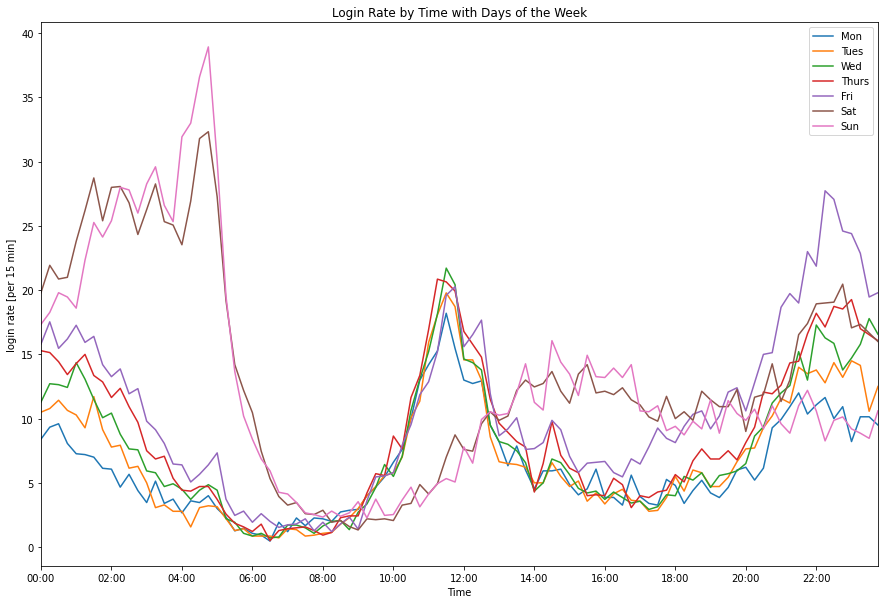

In [65]:
# Plot Mean Time for Each Day of the Week

pd.plotting.register_matplotlib_converters()

logins_count_ave_dayofweek_time = logins_count_15min.groupby([logins_count_15min.index.weekday, logins_count_15min.index.time]).mean()

day_of_week = ["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"]
plt.figure(figsize=(15, 10))
for i in range(7):
    plt.plot(logins_count_ave_dayofweek_time.loc[i], label=day_of_week[i])
plt.ylabel("login rate [per 15 min]")
plt.xticks([7200 * h for h in range(12)])
plt.xlabel("Time")
plt.legend(loc="upper right")
plt.xlim([0, 3600 * 23.75])
plt.title("Login Rate by Time with Days of the Week")